In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [4]:
np.random.seed(1337)
random.seed(1337)

In [5]:
from sklearn.datasets import make_moons, make_blobs

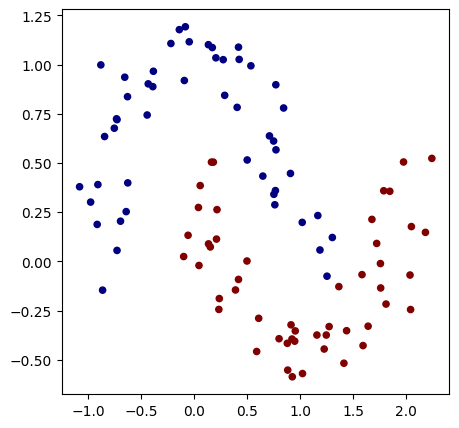

In [6]:
#make up dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples= 100, noise=0.15)

y = y*2 - 1 #make y be -1 or 1
#visualising in 2d
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 20, cmap= 'jet')

In [18]:
#initialize a model
model = MLP(2, [16, 16, 1]) #2-layer nn
print(model)
print("Number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
Number of parameters 337


In [8]:
#Loss Function

def loss(batch_size = None):
    
    # inline DataLoader
    if batch_size is None:
        Xb, yb, = X, y
    
    else:
        ri = np.random.permutation(X.shape[0])[: batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list (map(Value, xrow)) for xrow in Xb]

    # forward the modle to fget scores 
    scores = list(map(model, inputs))

    #svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    #L2 regularization 
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))

    total_loss = data_loss + reg_loss

    #also fet accuracy 
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss)

Value(data=0.8946231664712156, grad=0)


In [12]:
#optimization 

for k in range (100):

    #forward
    total_loss, acc = loss()
    
    #backward
    model.zero_grad()
    total_loss.backward()

    #update (sgd)
    learning_rate = 1.0 - 0.9*k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 5 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.258058836394721, accuracy 25.0%
step 5 loss 0.32984392481537217, accuracy 87.0%
step 10 loss 0.3547775185822703, accuracy 86.0%


KeyboardInterrupt: 

In [19]:
#optimization 

for k in range (100):

    #forward
    total_loss, acc = loss(25)
    
    #backward
    model.zero_grad()
    total_loss.backward()

    #update (sgd)
    learning_rate = 1.0 - 0.9*k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 5 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.6195916471354663, accuracy 44.0%
step 5 loss 0.40199170820248703, accuracy 80.0%
step 10 loss 0.3393817394634509, accuracy 80.0%
step 15 loss 0.6043443775184404, accuracy 76.0%
step 20 loss 0.20405229898569457, accuracy 92.0%
step 25 loss 0.13115618565016535, accuracy 96.0%
step 30 loss 0.091590964013815, accuracy 96.0%
step 35 loss 0.09107801758873331, accuracy 96.0%
step 40 loss 0.11056121921666584, accuracy 96.0%
step 45 loss 0.15228794139976942, accuracy 92.0%
step 50 loss 0.13323987913837607, accuracy 96.0%
step 55 loss 0.15662757957679918, accuracy 96.0%
step 60 loss 0.10032404063576439, accuracy 96.0%
step 65 loss 0.10825818058937017, accuracy 96.0%
step 70 loss 0.011517793833517701, accuracy 100.0%
step 75 loss 0.2581752802041949, accuracy 84.0%
step 80 loss 0.06014584176209134, accuracy 100.0%
step 85 loss 0.05330109081715975, accuracy 100.0%
step 90 loss 0.056716731943337026, accuracy 100.0%
step 95 loss 0.11454529221383858, accuracy 100.0%


(-1.5854949913120526, 2.1645050086879474)

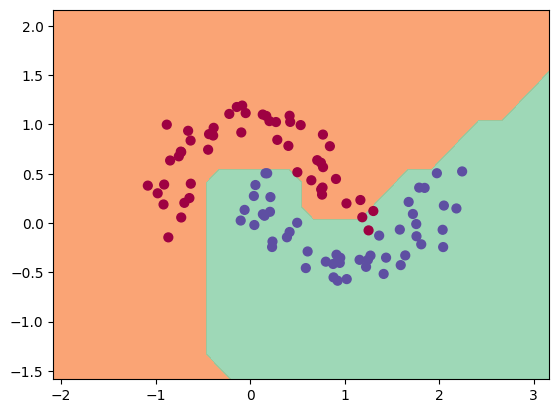

In [20]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())